In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# === Load data ===
data_dir = "C:/Users/troyr/OneDrive - Self Taught LLC/PythonDev/03-projects/fred-trade-analysis/data"

gdpc1 = pd.read_csv(f"{data_dir}/GDPC1.csv", index_col="Date", parse_dates=True)
gdpca = pd.read_csv(f"{data_dir}/GDPCA.csv", index_col="Date", parse_dates=True)
gnpca = pd.read_csv(f"{data_dir}/GNPCA.csv", index_col="Date", parse_dates=True)

# === Combine and normalize to 1929 = 100 ===
df = gdpc1.join(gdpca, how="outer").join(gnpca, how="outer")
df = df.dropna()
df_norm = df / df.iloc[0] * 100  # 1929 base = 100

# Save normalized DataFrame for later use
df_norm.head()


,Real GDP (Chained 2012 Dollars),Nominal GDP (Current Dollars),Gross National Product (Current Dollars)
Date,,,
1947-01-01,100.000000,100.000000,100.000000
1948-01-01,102.611513,104.120316,104.205450
1949-01-01,103.579360,103.539023,103.572479
1950-01-01,107.487260,112.538508,112.585021
1951-01-01,118.843157,121.592190,121.738652


✅ Plot saved to: C:/Users/troyr/OneDrive - Self Taught LLC/PythonDev/03-projects/fred-trade-analysis/outputs\normalized_gdp_gnp_with_events.png


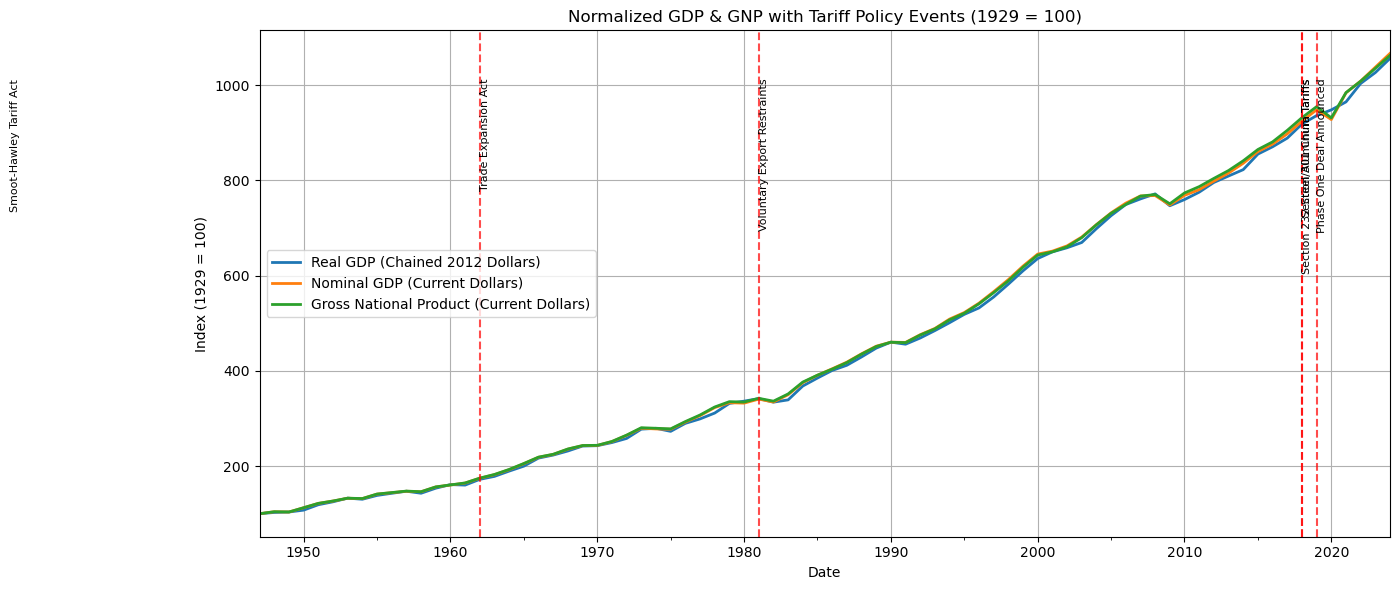

In [2]:
# === Load tariff events ===
events_path = f"{data_dir}/TARIFF_EVENTS_CLEANED.csv"
events_df = pd.read_csv(events_path, parse_dates=["Date"])

# Filter out any invalid dates (safety)
events_df = events_df[events_df["Date"].notna()]

# === Plot normalized GDP and GNP with tariff markers ===
plt.figure(figsize=(14, 6))
df_norm.plot(ax=plt.gca(), linewidth=2)

# Overlay vertical lines for tariff events
for _, row in events_df.iterrows():
    plt.axvline(x=row["Date"], color="red", linestyle="--", alpha=0.7)
    plt.text(row["Date"], df_norm.max().max() * 0.95, row["Event_Name"],
             rotation=90, verticalalignment='top', fontsize=8)

plt.title("Normalized GDP & GNP with Tariff Policy Events (1929 = 100)")
plt.xlabel("Date")
plt.ylabel("Index (1929 = 100)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# === Save plot ===
output_path = os.path.join(
    "C:/Users/troyr/OneDrive - Self Taught LLC/PythonDev/03-projects/fred-trade-analysis/outputs",
    "normalized_gdp_gnp_with_events.png"
)
plt.savefig(output_path)
print(f"✅ Plot saved to: {output_path}")

plt.show()


✅ Zoomed plot saved to: C:/Users/troyr/OneDrive - Self Taught LLC/PythonDev/03-projects/fred-trade-analysis/outputs\zoomed_gdp_gnp_1947_1950.png


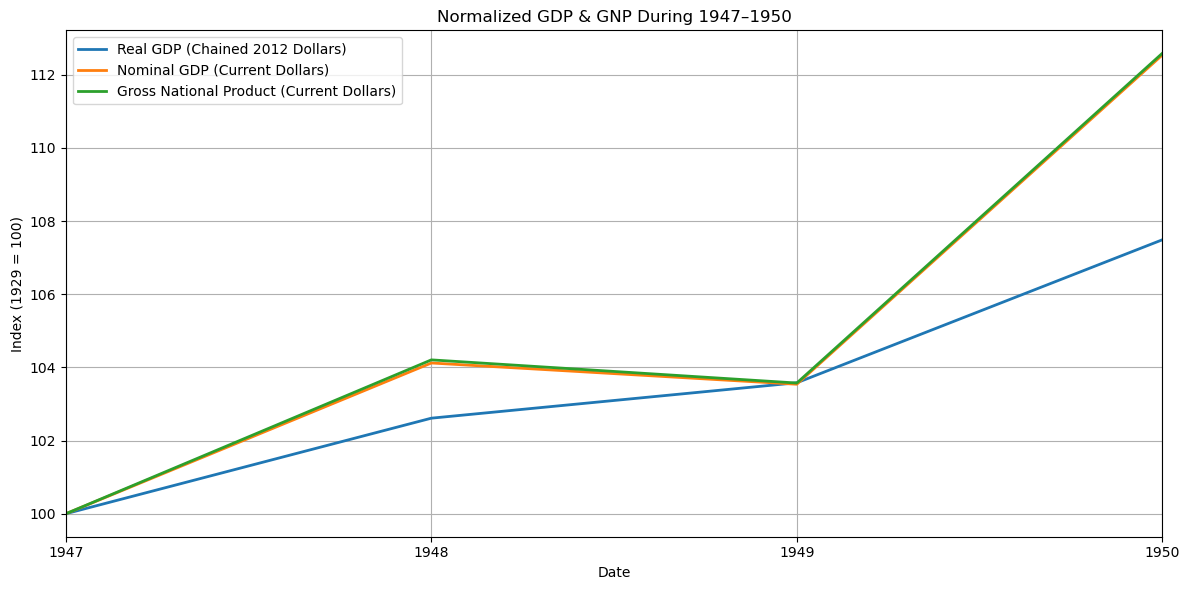

In [4]:
# === Set zoom window (1929–1950) ===
start_date = "1947-01-01"
end_date = "1950-01-01"

# === Subset data
df_zoom = df_norm.loc[start_date:end_date]

# === Plot zoomed window
plt.figure(figsize=(12, 6))
df_zoom.plot(ax=plt.gca(), linewidth=2)

# Add only relevant events in this window
events_zoom = events_df[(events_df["Date"] >= start_date) & (events_df["Date"] <= end_date)]

for _, row in events_zoom.iterrows():
    plt.axvline(x=row["Date"], color="red", linestyle="--", alpha=0.7)
    plt.text(row["Date"], df_zoom.max().max() * 0.95, row["Event_Name"],
             rotation=90, verticalalignment='top', fontsize=8)

plt.title(f"Normalized GDP & GNP During {start_date[:4]}–{end_date[:4]}")
plt.xlabel("Date")
plt.ylabel("Index (1929 = 100)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save zoomed plot
output_path = os.path.join(
    "C:/Users/troyr/OneDrive - Self Taught LLC/PythonDev/03-projects/fred-trade-analysis/outputs",
    f"zoomed_gdp_gnp_{start_date[:4]}_{end_date[:4]}.png"
)
plt.savefig(output_path)
print(f"✅ Zoomed plot saved to: {output_path}")

plt.show()
